<a href="https://colab.research.google.com/github/johnnycleiton07/image-processing/blob/main/morphological_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

#**PROCESSAMENTO MORFOLÓGICO DE IMAGENS**

## Processamento Digital de Imagens

Ciência da Computação 


</center>

# Processamento Morfológico

* A área de **morfologia matemática** é utilizada como ferramenta para extrair componentes das imagens que são úteis na representação e na descrição da forma de uma região. 

* As operações morfológicas mais utilizadas são: **Erosão** e **Dilatação** que podem ser combinadas para fazer as operações de **Abertura** e **Fechamento**.

* Tais operações funcionam da seguinte maneira:

  * Primeiro, geralmente, é feita uma binarização da imagem a ser processada;
  * Em seguida, é definido um operador conhecido como **elemento estruturante**;
  * Esse elemento será aplicado sobre a imagem, analisando cada pixel e seus vizinhos, buscando propriedades de interesse para realizar a operação;
  * E assim, haverá uma modificação na imagem em cada pixel que "casar" com o elemento estruturante.


### Operações Morfológicas em Python





In [108]:
#acessando arquivos no google drive
from google.colab import drive
drive.mount('/content/drive')

#importando as bibliotecas
import cv2
import numpy as np
import imageio 
from skimage import morphology
from skimage.morphology import (square, rectangle, diamond, disk, star)
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


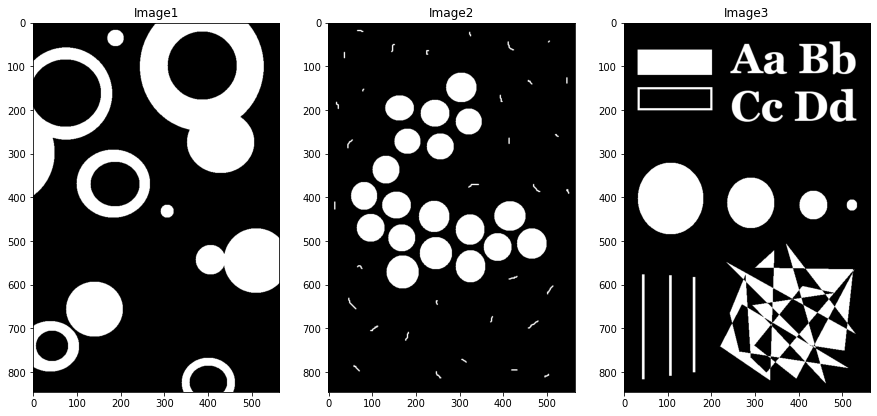

In [129]:
#leitura das imagens
image_path = "/content/drive/MyDrive/Colab Notebooks/images/"

image1 = cv2.imread((image_path + "morph1.png"), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread((image_path + "morph2.png"), cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread((image_path + "morph3.png"), cv2.IMREAD_GRAYSCALE)

fig = plt.figure(figsize=(15, 8), constrained_layout=False)
ax1 = fig.add_subplot(1, 3, 1); ax1.imshow(image1, cmap="gray"),plt.title("Image1")
ax2 = fig.add_subplot(1, 3, 2); ax2.imshow(image2, cmap="gray"),plt.title("Image2")
ax3 = fig.add_subplot(1, 3, 3); ax3.imshow(image3, cmap="gray"),plt.title("Image3")
plt.show()

* Apesar das imagens acima já estarem em formato binário (preto e branco), o seguinte trecho de código irá realizar a binarização como uma condição para garantir a correta execução das operações:

In [28]:
#binarização da imagem para garantir a correta execução das operações

#este trecho de código é essencial para todas as operações!

def binarizar(image):
    imagem_bin = np.zeros(image.shape)
    for i in range(len(image)):
        for j in range(len(image[0])):
            if image[i, j] != 0:
                imagem_bin[i, j] = 255
    
    resultado = np.copy(imagem_bin) 
    return resultado

#### Elemento Estruturante

Ao trabalhar com imagens, é necessário que os elementos estruturantes sejam **arranjos matriciais retângulares**. 

* Para deixar o elemento estruturante retangular, é adicionando o menor número possível de elementos de fundo. Isso transforma o elemento em um pedaço de imagem (sub-imagem).

* Quanto maior for o elemento estruturante, mais intensa será a modificação na imagem.

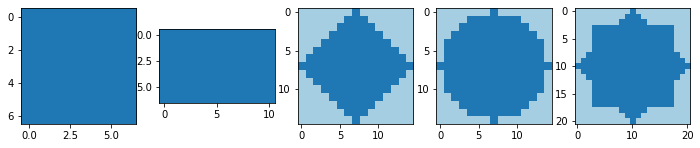

In [56]:
#visualização dos elementos estruturantes que podem ser utilizados nas operações
elementos = [square(7), rectangle(7, 11), diamond(7), disk(7), star(7)]
fig = plt.figure(figsize=(12,6))

pos = 1
for i in elementos:
  ax = fig.add_subplot(1, 5, pos)
  ax.imshow(i, cmap="Paired", vmin=0, vmax=10)
  pos += 1

In [158]:
#visualização de elemento estruturante como matriz de pixels
diamond(7)

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)



---

## **Erosão Morfológica**

A operação de erosão possui como efeito visual a "corroção" da imagem, desgastando seu formato.

* Seus efeitos incluem:
  - Diminuição de partículas
  - Aumento de buracos
  - Separação de componentes conectados
  - Eliminação de componentes menores que o elemento estruturante

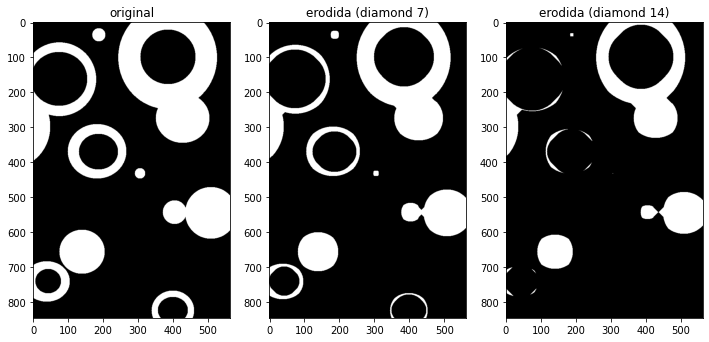

In [126]:
#operação de erosão
img = binarizar(image1)

erosao1 = morphology.binary_erosion(img, morphology.diamond(7)).astype(np.uint8)
erosao2 = morphology.binary_erosion(img, morphology.diamond(14)).astype(np.uint8)

fig = plt.figure(figsize=(12, 8))
plt.subplot(1,3,1); (plt.imshow(img, cmap="gray")); plt.title("original")
plt.subplot(1,3,2); (plt.imshow(erosao1, cmap="gray")); plt.title("erodida (diamond 7)")
plt.subplot(1,3,3); (plt.imshow(erosao2, cmap="gray")); plt.title("erodida (diamond 14)")
plt.show()



---

## **Dilatação Morfológica**

A operação de dilatação possui como efeito visual o aumento das formas da imagem.

* Seus efeitos incluem:
  - Expansão de partículas
  - Preenchimento de buracos
  - Conexão de componentes próximos

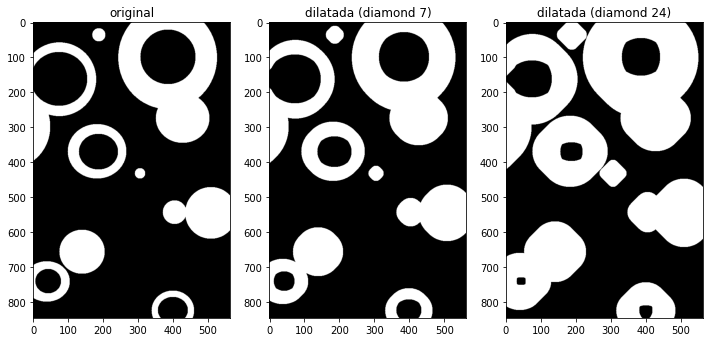

In [125]:
#operação de dilatação
img = binarizar(image1)

dilatacao1 = morphology.binary_dilation(img, morphology.diamond(7)).astype(np.uint8)
dilatacao2 = morphology.binary_dilation(img, morphology.diamond(24)).astype(np.uint8)

fig = plt.figure(figsize=(12, 8))
plt.subplot(1,3,1); (plt.imshow(img, cmap="gray")); plt.title("original")
plt.subplot(1,3,2); (plt.imshow(dilatacao1, cmap="gray")); plt.title("dilatada (diamond 7)")
plt.subplot(1,3,3); (plt.imshow(dilatacao2, cmap="gray")); plt.title("dilatada (diamond 24)")
plt.show()



---


## **Abertura Morfológica**

A operação de abertura pode ser entendida como uma transformação da imagem por erosão seguida de dilatação.

- Elimina pequenos componentes e suaviza o contorno

**OBS:** quando uma característica some na erosão, não é refeita com a dilatação.

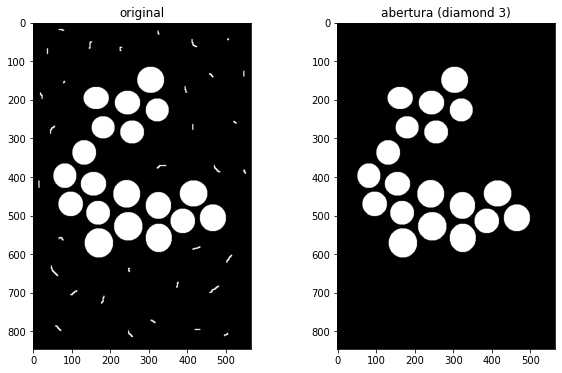

In [130]:
#operação de abertura
img = binarizar(image2)

abertura = morphology.binary_opening(img, morphology.diamond(3)).astype(np.uint8)

fig = plt.figure(figsize=(10, 6))
plt.subplot(1,2,1); (plt.imshow(img, cmap="gray")); plt.title("original")
plt.subplot(1,2,2); (plt.imshow(abertura, cmap="gray")); plt.title("abertura (diamond 3)")
plt.show()



---

## **Fechamento Morfológico**

A operação de fechamento pode ser entendida como uma transformação da imagem por dilatação seguida de erosão.

- Fecha pequenos buracos e conecta componentes

**OBS:** quando uma característica se funde a outra causando um "fechamento" com a dilatação, a erosão não irá abrir o que foi fechado.

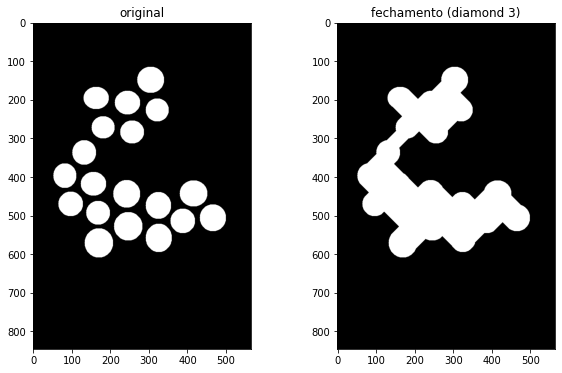

In [136]:
#operação de fechamento
img = binarizar(abertura) #aproveitei o resultado da operação de abertura para usar de imagem exemplo

fechamento = morphology.binary_closing(img, morphology.diamond(24)).astype(np.uint8)

fig = plt.figure(figsize=(10, 6))
plt.subplot(1,2,1); (plt.imshow(img, cmap="gray")); plt.title("original")
plt.subplot(1,2,2); (plt.imshow(fechamento, cmap="gray")); plt.title("fechamento (diamond 3)")
plt.show()



---

### **Observação dos efeitos das operações na terceira imagem exemplo**

Também é possível utilizar a biblioteca OpenCv para fazer operações morfológicas em python. O funcionamento em geral é bem semelhante ao da biblioteca Skimage (utilizada nos códigos já demonstrados).

In [153]:
#elemento estruturante
elemento_estruturante = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
print (elemento_estruturante)

[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


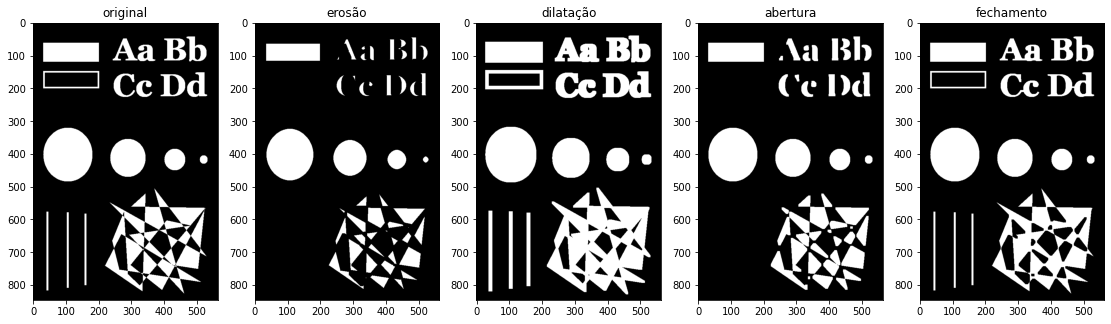

In [157]:
img = binarizar(image3)

#operações morfológicas utilizando a OpenCv
erosao = cv2.erode(img, elemento_estruturante)
dilatacao = cv2.dilate(img, elemento_estruturante)
abertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, elemento_estruturante)
fechamento = cv2.morphologyEx(img, cv2.MORPH_CLOSE, elemento_estruturante)

#plotagem dos resultados
image = plt.figure(figsize=(6.4 * 3, 4.8 * 3))

ax1 = image.add_subplot(1,5,1); ax1.imshow(img, 'gray'); plt.title('original')
ax2 = image.add_subplot(1,5,2); ax2.imshow(erosao, 'gray'); plt.title('erosão')
ax3 = image.add_subplot(1,5,3); ax3.imshow(dilatacao, 'gray'); plt.title('dilatação')
ax4 = image.add_subplot(1,5,4); ax4.imshow(abertura, 'gray'); plt.title('abertura')
ax5 = image.add_subplot(1,5,5); ax5.imshow(fechamento, 'gray'); plt.title('fechamento')
plt.show()

* Observações:

  * Na erosão, há um desgaste simbólico nas letras; as linhas verticais e a borda de retângulo são completamente corroídas.

  * Na dilatação, as letras ganham um efeito de "bold"; alguns traços do componente geométrico são ligados.

  * Na abertura (erosão seguida de dilatação), os componentes que sumiram na erosão, não foram refeitos com a dilatação.

  * No fechamento (dilatação seguida de erosão), é possível notar um certo refinamento do resultado da dilatação.

---


# Bibliografia

- GONZALEZ, Rafael C.; WOODS, Richard E. Processamento de imagens digitais. Editora Blucher, 2000

- https://sites.google.com/arapiraca.ufal.br/tacito-neves-ufal/home?authuser=0

- https://youtu.be/7rSTK36IUEk?list=PLYDsgs3UPVrL0HaIt2-jOI6HOUT7dVguX

- https://github-wiki-see.page/m/cmdiniz/Tutorial_OpenCV/wiki/Operações-morfológicas

- https://www.inf.ufpr.br/lesoliveira/download/morfologia.pdf